
[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


STD Series: From 0.001 to 1.0
Input range: From -6.0 to 6.0
Generated 1000000 cartesian products in total
    Series1  Series2  Series3  Label
0 -6.000000     -1.0    0.001    0.0
1 -5.755102     -1.0    0.001    0.0
2 -5.510204     -1.0    0.001    0.0
3 -5.265306     -1.0    0.001    0.0
4 -5.020408     -1.0    0.001    0.0


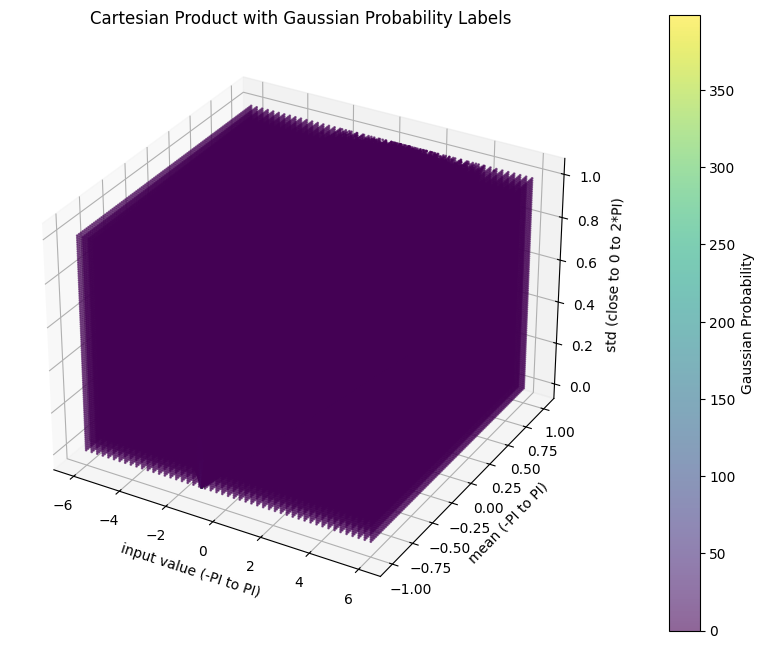

In [ ]:
# Install necessary dependencies
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Step 1: Generate the series
num_values = 100

# STD Series: From a very small number close to 0 to 2*PI, to insure wide representation of std values. Low ones having a "sharper" curve, higher ones having a "flatter" curve.
# Potentially want to distribute it more over the higher numebrs, since lower numbers are less likely to be used in practice.
small_number = 0.001
std = np.linspace(small_number, 1, num_values)
print(f"STD Series: From {std.min()} to {std.max()}")

# Mean Series: From -PI to +PI, just a wide range to shift the center of the curve to different locations.
mean = np.linspace(-1, 1, num_values)

# We add a minimum input value and maximum input value based on the smallest and highest mean and the maximum std values
min_input = mean.min() - 5 * std.max()
max_input = mean.max() + 5 * std.max()

print(f"Input range: From {min_input} to {max_input}")

# Now for each std and mean, we want to generate a set of 100 input values for each mean std pair, resulting in 100 * 100 * 100 = 1,000,000 input values in the end.
# We want input values to be distributed around the mean, with a maximum of 3 standard deviations away from the mean.
# Input values further away from the mean should be rarer, with more existing closer to the mean.
cartesian_product = []
for m, s in itertools.product(mean, std):
    # Generate Input values
    inputval = []
    # Linearly spaced values from min_input to max_input for 50% of the values
    samples = np.linspace(min_input, max_input, int(num_values * 0.5))
    
    # Add samples with a normal distribution around the mean for the remaining 50% of the values
    normal_samples = np.random.normal(m, s, int(num_values * 0.5))
    samples = np.concatenate((samples, normal_samples))
    
    inputval.extend(samples)
    # Make cartesian product for input values and m, s
    cartesian_product_input = list(itertools.product(inputval, [m], [s]))
    cartesian_product.extend(cartesian_product_input)

print(f"Generated {len(cartesian_product)} cartesian products in total")

# Convert to a pandas DataFrame for better visualization
cartesian_df = pd.DataFrame(cartesian_product, columns=['Series1', 'Series2', 'Series3'])

# Step 3: Compute the labels using the Gaussian probability function
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

cartesian_df['Label'] = cartesian_df.apply(lambda row: gaussian_probability(row['Series1'], row['Series2'], row['Series3']), axis=1)


# Display the first few rows of the DataFrame with labels
print(cartesian_df.head())

# Step 4: Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract Cartesian values for plotting
x = cartesian_df['Series1']
y = cartesian_df['Series2']
z = cartesian_df['Series3']
labels = cartesian_df['Label']

# Scatter plot with color representing the labels
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', s=1, alpha=0.6)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Gaussian Probability')

# Label the axes
ax.set_xlabel('input value (-PI to PI)')
ax.set_ylabel('mean (-PI to PI)')
ax.set_zlabel('std (close to 0 to 2*PI)')

plt.title('Cartesian Product with Gaussian Probability Labels')
plt.show()


In [2]:
cartesian_df.describe()

,Series1,Series2,Series3,Label
count,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06
mean,0.000095,3.874447e-16,0.500500,1.780729e+00
std,2.595772,5.831532e-01,0.291285,1.914223e+01
min,-6.000000,-1.000000e+00,0.001000,0.000000e+00
25%,-1.188305,-5.000000e-01,0.250750,4.195522e-09
50%,-0.000482,5.551115e-17,0.500500,1.016086e-01
75%,1.190923,5.000000e-01,0.750250,5.098453e-01
max,6.000000,1.000000e+00,1.000000,3.989422e+02


In [3]:
labels.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Label, dtype: float64

In [4]:
labels.describe()

count    1.000000e+06
mean     1.780729e+00
std      1.914223e+01
min      0.000000e+00
25%      4.195522e-09
50%      1.016086e-01
75%      5.098453e-01
max      3.989422e+02
Name: Label, dtype: float64

In [5]:
import numpy as np

# Example labels (replace with your actual labels)
labels = cartesian_df['Label']

labels.quantile(0.93)

np.float64(1.753396372832169)

(array([9.68483e+05, 1.53160e+04, 4.38000e+03, 2.39100e+03, 2.10100e+03,
        2.90000e+02, 7.30000e+02, 4.35000e+02, 1.42000e+03, 1.54000e+02,
        1.60000e+01, 1.10000e+01, 2.09000e+02, 1.50000e+01, 8.00000e+00,
        8.00000e+00, 1.40000e+01, 1.00000e+01, 8.00000e+00, 1.80000e+01,
        2.10000e+01, 1.30000e+01, 2.10000e+02, 1.40000e+01, 1.50000e+01,
        1.00000e+01, 1.50000e+01, 1.80000e+01, 1.80000e+01, 1.70000e+01,
        1.20000e+01, 1.30000e+01, 1.10000e+01, 2.00000e+01, 2.10000e+01,
        2.00000e+01, 2.19000e+02, 2.00000e+01, 1.80000e+01, 1.50000e+01,
        7.00000e+00, 1.10000e+01, 1.70000e+01, 1.80000e+01, 2.30000e+01,
        2.00000e+01, 2.20000e+01, 1.80000e+01, 1.50000e+01, 2.30000e+01,
        2.10000e+01, 2.20000e+01, 1.80000e+01, 2.40000e+01, 2.22000e+02,
        1.30000e+01, 1.60000e+01, 2.70000e+01, 2.60000e+01, 3.00000e+01,
        3.60000e+01, 2.70000e+01, 2.00000e+01, 2.30000e+01, 3.00000e+01,
        3.30000e+01, 2.30000e+01, 2.00000e+01, 3.10

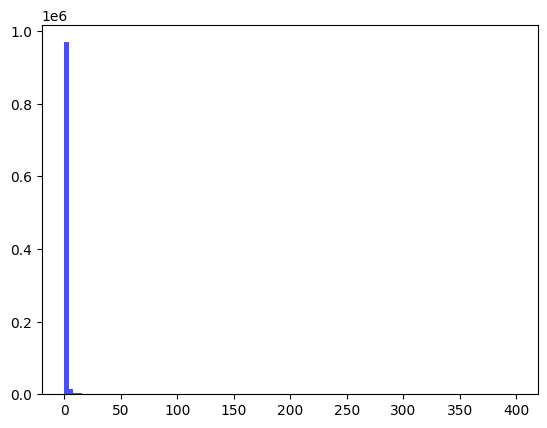

In [6]:
import numpy as np
import pandas as pd

# Assuming cartesian_df is your DataFrame with 'Label' column
# Step 1: Apply log transformation to the labels (to handle very small values)
#cartesian_df['Label'] = np.log1p(cartesian_df['Label'])  # log1p to handle values close to 0

cartesian_df['Label'].describe()
plt.hist(cartesian_df['Label'], bins=100, color='blue', alpha=0.7, label='Label Distribution')

In [7]:
cartesian_df['Label'].quantile(0.9)

np.float64(1.224516000502025)

In [8]:
# Do duplicate rows exist?
duplicates = cartesian_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [9]:
# Install necessary dependency
!pip install scikit-learn

from sklearn.model_selection import train_test_split
import os

# Step 1: Split the data into an 80/20 train/test set
train_df, test_df = train_test_split(cartesian_df, test_size=0.2, train_size=0.8, random_state=42)



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Additionally save a normalized version of the dataset
# With feature AND label normalization
from sklearn.preprocessing import StandardScaler
import pickle

# Standardize the features and labels
feature_scaler = StandardScaler()
cartesian_df_standardized = cartesian_df.copy()
cartesian_df_standardized[['Series1', 'Series2', 'Series3']] = feature_scaler.fit_transform(cartesian_df_standardized[['Series1', 'Series2', 'Series3']])

label_scaler = StandardScaler()
cartesian_df_standardized['Label'] = label_scaler.fit_transform(cartesian_df_standardized[['Label']])
cartesian_df_standardized.describe()

# Split the standardized dataset and save with scalers
train_df, test_df = train_test_split(cartesian_df_standardized, test_size=0.2, train_size=0.8, random_state=42)


In [ ]:
# Do the same as above with scaling the features only and log1p normalizing the lables
import pickle

# Log1p normalize the labels
cartesian_df_standardized_copy = cartesian_df_standardized.copy()
cartesian_df_standardized_copy['Label'] = np.log1p(cartesian_df['Label'])
print(cartesian_df_standardized_copy['Label'].describe())

# Split the dataset
train_df, test_df = train_test_split(cartesian_df_standardized_copy, test_size=0.2, train_size=0.8, random_state=42)

# Save the datasets to files
train_file = os.path.join(output_folder, "train_low_std_range_very_low_std_standardized_log1p.csv")
test_file = os.path.join(output_folder, "test_low_std_range_very_low_std_standardized_log1p.csv")

# pickle only the feature scaler
scaler_file = os.path.join(output_folder, "scaler_low_std_range_very_low_std_feature.pkl")

# Save files
train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)

# Pickle the feature scaler
with open(scaler_file, 'wb') as f:
    pickle.dump(feature_scaler, f)


count    1.000000e+06
mean     3.164449e-01
std      5.775736e-01
min      0.000000e+00
25%      4.195522e-09
50%      9.677145e-02
75%      4.120072e-01
max      5.991320e+00
Name: Label, dtype: float64


In [12]:
train_df["Label"].describe()

count    8.000000e+05
mean     3.165487e-01
std      5.774442e-01
min      0.000000e+00
25%      4.289651e-09
50%      9.727914e-02
75%      4.120072e-01
max      5.991320e+00
Name: Label, dtype: float64

In [13]:
test_df["Label"].describe()

count    2.000000e+05
mean     3.160300e-01
std      5.780918e-01
min      0.000000e+00
25%      3.799229e-09
50%      9.458230e-02
75%      4.120093e-01
max      5.991319e+00
Name: Label, dtype: float64

In [14]:
# identify outliers
cut_off = train_df["Label"].std() * 3
data_mean = train_df["Label"].mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train_df["Label"].values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in train_df["Label"].values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

outlieres_removed_series = pd.Series(outliers_removed)
print(outlieres_removed_series.describe())
outlieres_removed_series.quantile(0.50)

Identified outliers: 15497
Non-outlier observations: 784503
count    7.845030e+05
mean     2.580390e-01
std      3.627600e-01
min      0.000000e+00
25%      1.960013e-09
50%      8.532979e-02
75%      3.943655e-01
max      2.048810e+00
dtype: float64


np.float64(0.08532978838136666)

In [15]:
# now do the same for the outliers removed series
cut_off = outlieres_removed_series.std() * 3
data_mean = outlieres_removed_series.mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in outlieres_removed_series.values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in outlieres_removed_series.values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 18974
Non-outlier observations: 765529


In [16]:
outliers_removed_series2 = pd.Series(outliers_removed)
outliers_removed_series2.describe()

count    7.655290e+05
mean     2.238476e-01
std      2.925624e-01
min      0.000000e+00
25%      6.921915e-10
50%      6.953479e-02
75%      3.755010e-01
max      1.346206e+00
dtype: float64

(array([323925.,  20785.,  14727.,  11553.,  10217.,   8101.,   8705.,
          8264.,   7048.,   6623.,   7677.,   7032.,   6684.,   6399.,
          7566.,   7190.,   7004.,   7146.,   7176.,   8165.,   8267.,
          8281.,   8932.,  10295.,  12034.,  12713.,  12343.,  10143.,
         10575.,   9135.,   8858.,   8110.,   7526.,   7262.,   6723.,
          6046.,   5527.,   5522.,   5349.,   4579.,   4562.,   4388.,
          4119.,   4208.,   3602.,   3590.,   3377.,   3298.,   2991.,
          2821.,   3193.,   2416.,   2735.,   2579.,   2155.,   2437.,
          2254.,   2057.,   2056.,   2063.,   2152.,   1607.,   1809.,
          1711.,   1472.,   1724.,   1751.,   1292.,   1638.,   1313.,
          1479.,   1164.,   1096.,   1480.,   1035.,   1534.,    993.,
          1074.,    909.,   1023.,   1199.,    578.,   1217.,    927.,
           910.,   1132.,    843.,    562.,   1085.,    625.,    984.,
           833.,    566.,    610.,    667.,    821.,    537.,    562.,
      

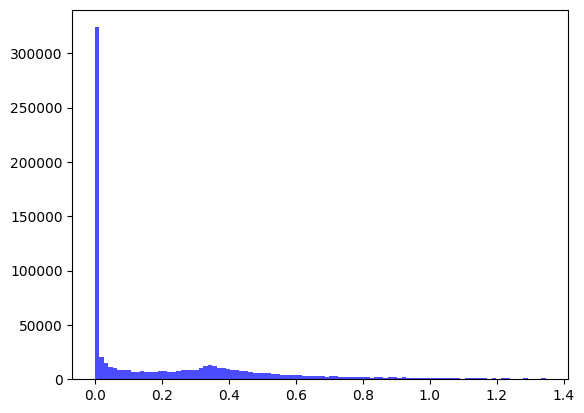

In [17]:
# plot the distribution of the outliers removed series 2
plt.hist(outliers_removed_series2, bins=100, color='blue', alpha=0.7, label='Outliers Removed')